**Desarrollo laboratorio de analisis de señales biomedicas**

Andres Carrasco Inostroza | 
https://www.aici.cl

Recursos previos 

In [45]:
!pip install wfdb

In [46]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, hilbert
import pandas as pd

Descarga de base de datos

In [47]:
wfdb.dl_database('mitdb', os.getcwd())

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

**Preguntas del laboratorio**

1 - Implementar un detector de peaks R y mostrar un ejemplo donde se aplique el detector

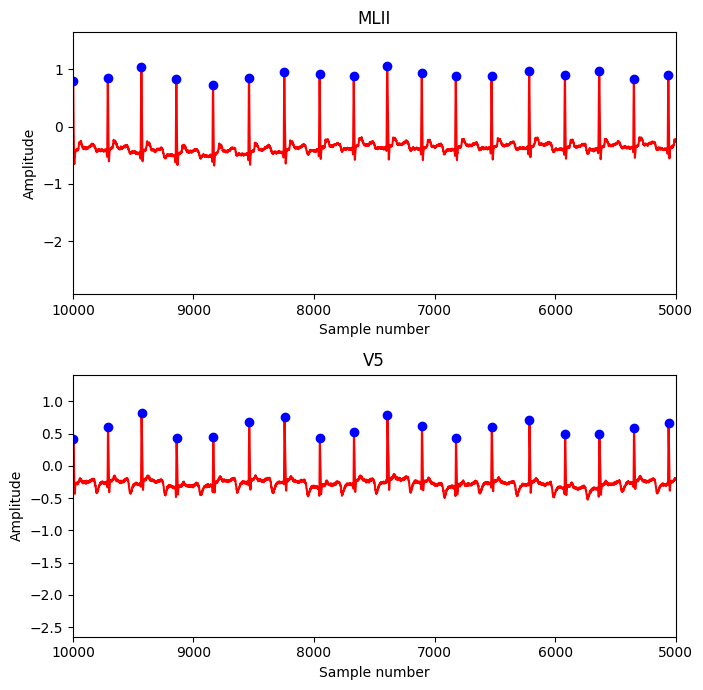

In [48]:
from scipy.signal import find_peaks

#Se leen los datos de la base de datos

record = wfdb.rdrecord('100')

#Se crea un array con cada señal utilizada

MLII = record.p_signal[:,0]
V5 = record.p_signal[:,1]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII, height=None, distance=200)
pV5 = find_peaks(V5, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])
p2V5 = np.array(pV5[0])

#Graficas de la deteccion de puntos

fig, axs = plt.subplots(2, 1, figsize=(7, 7))

axs[0].plot(MLII,'-r')
axs[0].plot(p2MLII,MLII[p2MLII],'ob')
axs[0].set_xlabel('Sample number')
axs[0].set_ylabel('Amplitude')
axs[0].set_title("MLII")
axs[0].set_xlim(right=5000)
axs[0].set_xlim(left=10000)

axs[1].plot(V5,'-r')
axs[1].plot(p2V5,V5[p2V5],'ob')
axs[1].set_xlabel('Sample number')
axs[1].set_ylabel('Amplitude')
axs[1].set_title("V5")
axs[1].set_xlim(right=5000)
axs[1].set_xlim(left=10000)

plt.tight_layout()
plt.show()


2 - Agregar ruido a la señal y presentar resultados

2.1 - gaussiano (media = 0 , std=1)

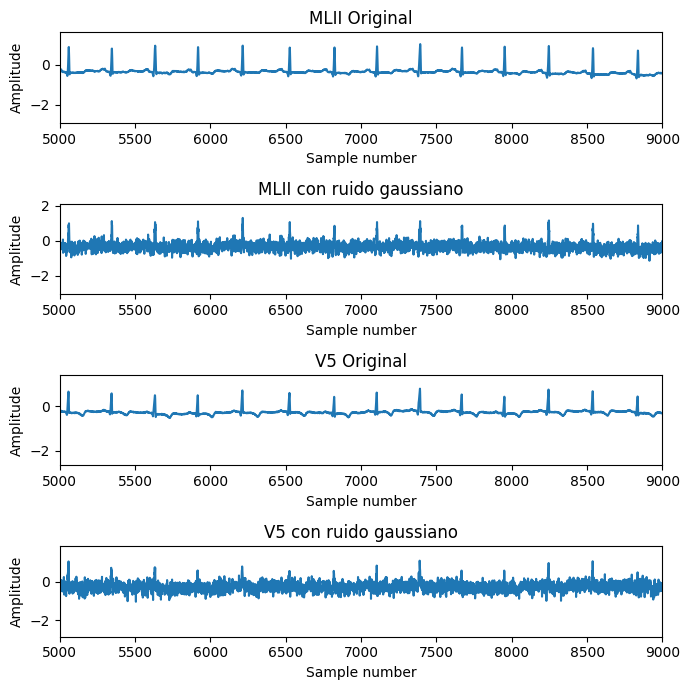

In [49]:

#Caracteristicas

media = 0        # Media del ruido
desviacion_std = 0.2  # Desviación estándar del ruido

MLII = record.p_signal[:,0]
V5 = record.p_signal[:,1]

# Generar ruido gaussiano

MLII_ruido_gaussiano = MLII + np.random.normal(media, desviacion_std, len(MLII))
V5_ruido_gaussiano = V5 + np.random.normal(media, desviacion_std, len(V5))

#Graficas de las señales originales y con ruido gaussiano

fig, axs = plt.subplots(4, 1, figsize=(7, 7))

axs[0].plot(MLII)
axs[0].set_xlabel('Sample number')
axs[0].set_ylabel('Amplitude')
axs[0].set_title("MLII Original")
axs[0].set_xlim(right=9000)
axs[0].set_xlim(left=5000)

axs[1].plot(MLII_ruido_gaussiano)
axs[1].set_xlabel('Sample number')
axs[1].set_ylabel('Amplitude')
axs[1].set_title("MLII con ruido gaussiano")
axs[1].set_xlim(right=9000)
axs[1].set_xlim(left=5000)

axs[2].plot(V5)
axs[2].set_xlabel('Sample number')
axs[2].set_ylabel('Amplitude')
axs[2].set_title("V5 Original")
axs[2].set_xlim(right=9000)
axs[2].set_xlim(left=5000)

axs[3].plot(V5_ruido_gaussiano)
axs[3].set_xlabel('Sample number')
axs[3].set_ylabel('Amplitude')
axs[3].set_title("V5 con ruido gaussiano")
axs[3].set_xlim(right=9000)
axs[3].set_xlim(left=5000)


plt.tight_layout()
plt.show()

2.2 - Una componente de 50Hz con amplitud unitaria

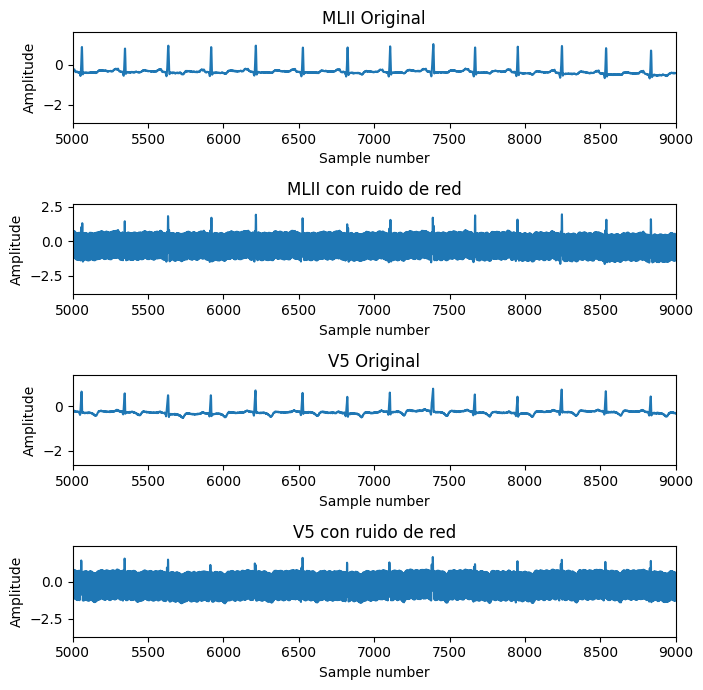

In [50]:
#Ruido de red

MLII_ruido_red = MLII + 1 * np.sin(2 * np.pi * 50 * np.arange(0, len(MLII)*(1/360), (1/360)))

V5_ruido_red = V5 + 1 * np.sin(2 * np.pi * 50 * np.arange(0, len(V5)*(1/360), (1/360)))

#Graficas de las señales originales y con ruido de red

fig, axs = plt.subplots(4, 1, figsize=(7, 7))

axs[0].plot(MLII)
axs[0].set_xlabel('Sample number')
axs[0].set_ylabel('Amplitude')
axs[0].set_title("MLII Original")
axs[0].set_xlim(right=9000)
axs[0].set_xlim(left=5000)

axs[1].plot(MLII_ruido_red)
axs[1].set_xlabel('Sample number')
axs[1].set_ylabel('Amplitude')
axs[1].set_title("MLII con ruido de red")
axs[1].set_xlim(right=9000)
axs[1].set_xlim(left=5000)

axs[2].plot(V5)
axs[2].set_xlabel('Sample number')
axs[2].set_ylabel('Amplitude')
axs[2].set_title("V5 Original")
axs[2].set_xlim(right=9000)
axs[2].set_xlim(left=5000)

axs[3].plot(V5_ruido_red)
axs[3].set_xlabel('Sample number')
axs[3].set_ylabel('Amplitude')
axs[3].set_title("V5 con ruido de red")
axs[3].set_xlim(right=9000)
axs[3].set_xlim(left=5000)

plt.tight_layout()
plt.show()


3 - Utilizando la información de las marcas en el dataset MIT-BIH, cuantificar la precisión
del detector.

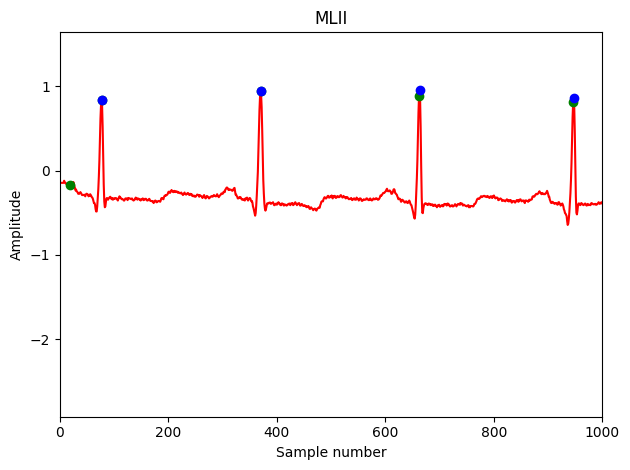

Threshold: 1
True_positives: 2201
False_negative: 73
False_positive: 73
Precision: 0.9377929271410311


0.9377929271410311

In [51]:
# Cargar el registro de ECG y las anotaciones

ann = wfdb.rdann('100', 'atr')  # Cargar las anotaciones de picos R

true_peaks = ann.sample  # Anotaciones de los picos R verdaderos

#Se leen los datos de la base de datos

record = wfdb.rdrecord('100')

#Se crea un array con cada señal utilizada

MLII = record.p_signal[:,0]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Sample number')
axs.set_ylabel('Amplitude')
axs.set_title("MLII")
axs.plot(MLII,'-r')
axs.plot(true_peaks, MLII[true_peaks], 'og', label='True R-peaks')
axs.plot(p2MLII,MLII[p2MLII],'ob')
axs.set_xlim(right=1000)
axs.set_xlim(left=0)

plt.tight_layout()
plt.show()

# Funcion para calcular la precision

def precision(true_peaks, p2MLII, threshold):
  
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    deteccion = 0

    for i in range(len(true_peaks)):
        for j in range(len(p2MLII)):
            if np.abs(true_peaks[i] - p2MLII[j]) <= threshold:
                true_positives += 1
                deteccion = 1
        if deteccion == 0:
            false_negatives += 1
        deteccion = 0

    for i in range(len(p2MLII)):
        for j in range(len(true_peaks)):
            if np.abs(p2MLII[i] - true_peaks[j]) <= threshold:
                deteccion = 1
        if deteccion == 0:
            false_positives += 1
        deteccion = 0

    false_positives = len(true_peaks) - true_positives

    relationship = true_positives / (false_negatives + false_positives + true_positives)
    
    print(f"Threshold: {threshold}")
    print(f"True_positives: {true_positives}")
    print(f"False_negative: {false_negatives}")
    print(f"False_positive: {false_positives}")
    print(f"Precision: {relationship}")
  
    return relationship
  
precision(true_peaks, p2MLII, 1)

3.1 - Utilizando la información de las marcas en el dataset MIT-BIH, cuantificar la precisión del detector **con ruido**.

3.11 - Ruido Gaussiano

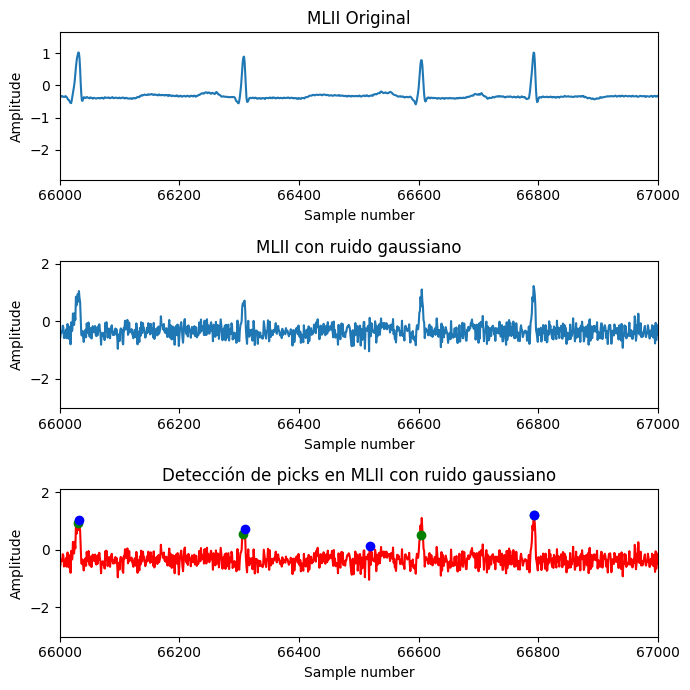

Threshold: 1
True_positives: 1883
False_negative: 391
False_positive: 391
Precision: 0.7065666041275798


0.7065666041275798

In [52]:

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII_ruido_gaussiano, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

#Graficas de la deteccion de puntos

fig, axs = plt.subplots(3, 1, figsize=(7, 7))

axs[0].plot(MLII)
axs[0].set_xlabel('Sample number')
axs[0].set_ylabel('Amplitude')
axs[0].set_title("MLII Original")
axs[0].set_xlim(right=67000)
axs[0].set_xlim(left=66000)

axs[1].plot(MLII_ruido_gaussiano)
axs[1].set_xlabel('Sample number')
axs[1].set_ylabel('Amplitude')
axs[1].set_title("MLII con ruido gaussiano")
axs[1].set_xlim(right=67000)
axs[1].set_xlim(left=66000)

axs[2].plot(MLII_ruido_gaussiano,'-r')
axs[2].plot(true_peaks, MLII_ruido_gaussiano[true_peaks], 'og', label='True R-peaks')
axs[2].plot(p2MLII,MLII_ruido_gaussiano[p2MLII],'ob')
axs[2].set_xlabel('Sample number')
axs[2].set_ylabel('Amplitude')
axs[2].set_title("Detección de picks en MLII con ruido gaussiano")
axs[2].set_xlim(right=67000)
axs[2].set_xlim(left=66000)

plt.tight_layout()
plt.show()

precision(true_peaks, p2MLII, 1)



3.12 Ruido de red

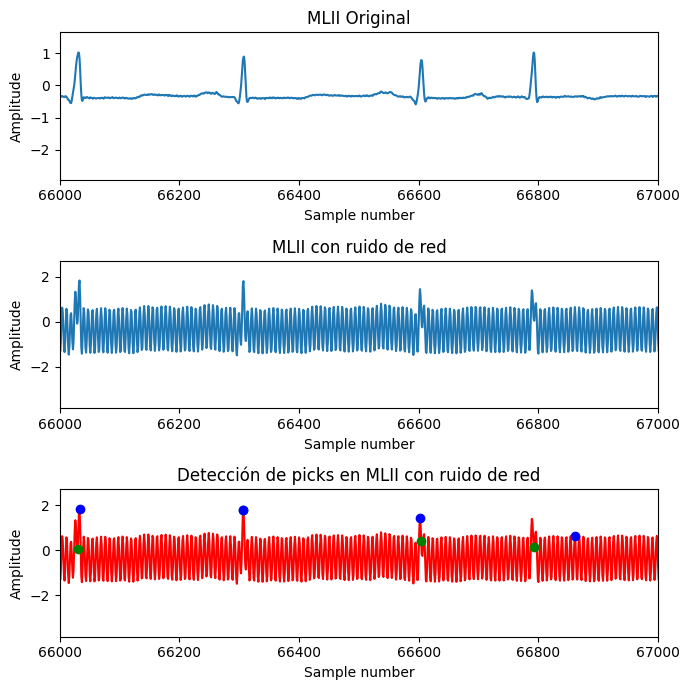

Threshold: 1
True_positives: 1109
False_negative: 1165
False_positive: 1165
Precision: 0.32247746437918


0.32247746437918

In [53]:

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII_ruido_red, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

#Graficas de la deteccion de puntos

fig, axs = plt.subplots(3, 1, figsize=(7, 7))

axs[0].plot(MLII)
axs[0].set_xlabel('Sample number')
axs[0].set_ylabel('Amplitude')
axs[0].set_title("MLII Original")
axs[0].set_xlim(right=67000)
axs[0].set_xlim(left=66000)

axs[1].plot(MLII_ruido_red)
axs[1].set_xlabel('Sample number')
axs[1].set_ylabel('Amplitude')
axs[1].set_title("MLII con ruido de red")
axs[1].set_xlim(right=67000)
axs[1].set_xlim(left=66000)

axs[2].plot(MLII_ruido_red,'-r')
axs[2].plot(true_peaks, MLII_ruido_red[true_peaks], 'og', label='True R-peaks')
axs[2].plot(p2MLII,MLII_ruido_red[p2MLII],'ob')
axs[2].set_xlabel('Sample number')
axs[2].set_ylabel('Amplitude')
axs[2].set_title("Detección de picks en MLII con ruido de red")
axs[2].set_xlim(right=67000)
axs[2].set_xlim(left=66000)

plt.tight_layout()
plt.show()

precision(true_peaks, p2MLII, 1)



3.13 Grafica de precision en funcion del threshold

Threshold: 0
True_positives: 1113
False_negative: 1161
False_positive: 1161
Precision: 0.3240174672489083
Threshold: 1
True_positives: 2201
False_negative: 73
False_positive: 73
Precision: 0.9377929271410311
Threshold: 2
True_positives: 2263
False_negative: 11
False_positive: 11
Precision: 0.9903719912472647
Threshold: 3
True_positives: 2264
False_negative: 10
False_positive: 10
Precision: 0.9912434325744308
Threshold: 4
True_positives: 2264
False_negative: 10
False_positive: 10
Precision: 0.9912434325744308
Threshold: 5
True_positives: 2264
False_negative: 10
False_positive: 10
Precision: 0.9912434325744308
Threshold: 6
True_positives: 2264
False_negative: 10
False_positive: 10
Precision: 0.9912434325744308
Threshold: 7
True_positives: 2264
False_negative: 10
False_positive: 10
Precision: 0.9912434325744308
Threshold: 8
True_positives: 2264
False_negative: 10
False_positive: 10
Precision: 0.9912434325744308
Threshold: 9
True_positives: 2264
False_negative: 10
False_positive: 10
Precis

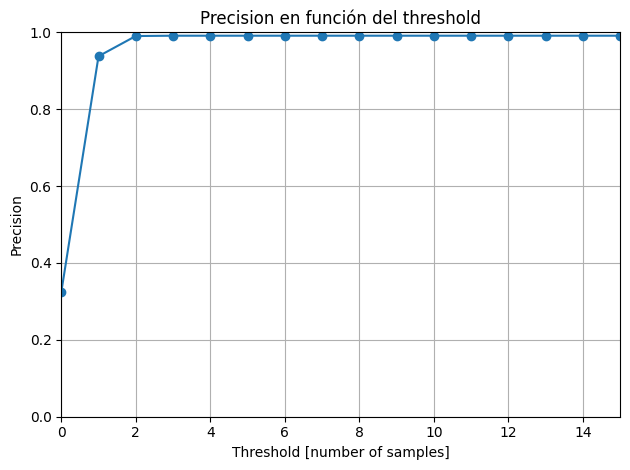

[0.3240174672489083, 0.9377929271410311, 0.9903719912472647, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308, 0.9912434325744308]


In [54]:
#Uso de los datos sin ruido

MLII = record.p_signal[:,0]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200

pMLII = find_peaks(MLII, height=None, distance=200)
p2MLII = np.array(pMLII[0])

thresholds = np.arange(0, 16)  

precisions = []

for threshold in thresholds:
    precision_value = precision(true_peaks, p2MLII, threshold)
    precisions.append(precision_value)
    
#Grafica de la precision en funcion del threshold    
    
fig, axs = plt.subplots(1, 1)

axs.plot(thresholds, precisions, marker='o')
axs.set_xlabel('Threshold [number of samples]')
axs.set_ylabel('Precision')
axs.set_title('Precision en función del threshold')
axs.grid(True)

plt.xlim([0, 15])
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

print(precisions)

4 - Calcular la variabilidad en la frecuencia cardiaca (HRV) en ventanas de 10[s], 30[s] y
60[s]. Presentar resultados en 2 participantes


Ventana de 10 [s] participante 100

contpicksw: [13, 12, 12, 12, 13, 12, 13, 12, 12, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 12, 13, 12, 12, 13, 12, 12, 13, 12, 12, 13, 12, 13, 12, 13, 13, 14, 13, 13, 13, 14, 13, 13, 13, 14, 14, 13, 13, 12, 14, 13, 12, 12, 13, 13, 13, 13, 12, 13, 13, 13, 12, 13, 13, 13, 13, 13, 14, 13, 13, 12, 13, 14, 12, 13, 12, 13, 12, 13, 13, 12, 13, 12, 13, 12, 13, 13, 12, 12, 12, 13, 12, 12, 12, 13, 12, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 13, 12, 12, 13, 12, 13, 12, 13, 12, 12, 13, 12, 13, 12, 12, 12, 13, 12, 12, 13, 12, 12, 12, 13, 12, 13, 12, 12, 13, 12, 12, 13, 12, 12, 12, 13, 12, 12, 12, 13, 12, 12, 12, 13, 12, 13, 12, 13, 12, 12, 13, 12, 12, 14, 13, 13, 12, 14, 13, 13, 13, 12, 13, 12, 13, 13, 14, 13, 12, 13, 14]
totalWindows: 180
avg: 12.583333333333334
variabilidad: [1.033112582781457, 0.9536423841059603, 0.9536423841059603, 0.9536423841059603, 1.033112582781457, 0.9536423841059603, 1.033112582781457, 0.9536423841059603, 0.9536423841059603, 0.9536423841059603, 1.03311258278

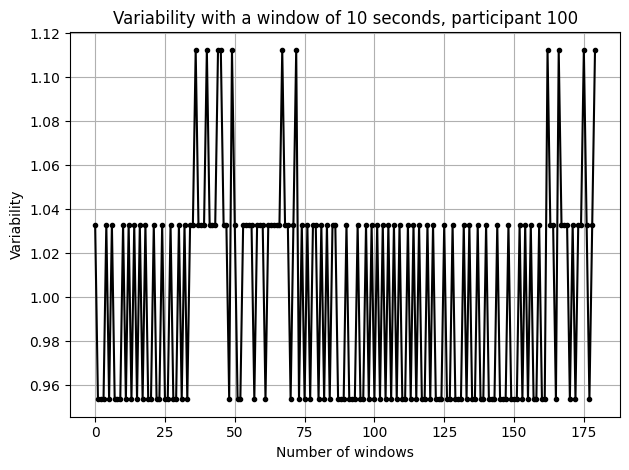

In [55]:
MLII = record.p_signal[:,0]

def HRV(señal, picks, tiempo):
  
    muestrasw = 360 * tiempo

    totalWindows = len(señal) / muestrasw

    contpicks = 0

    contpicksw = []

    for i in range(int(totalWindows)):
        
        lLimit = i * muestrasw
        rLimit = (i + 1) * muestrasw
        
        for j in range(len(picks)):
        
            if picks[j] >= lLimit and picks[j] < rLimit:
                contpicks += 1
        
        contpicksw.append(contpicks)
        
        contpicks = 0

    print(f"contpicksw: {contpicksw}")
    
    print(f"totalWindows: {len(contpicksw)}")
        
    avg = np.average(contpicksw)

    print(f"avg: {avg}")

    variabilidad = []

    for i in range(len(contpicksw)):
        
        var = (contpicksw[i]/avg)
        
        variabilidad.append(var)
        
    return variabilidad

variabilidad = HRV(MLII, p2MLII, 10)

print(f"variabilidad: {variabilidad}")

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Number of windows')
axs.set_ylabel('Variability')
axs.set_title("Variability with a window of 10 seconds, participant 100")
axs.grid(True)
axs.plot(variabilidad, '.-k')

plt.tight_layout()
plt.show()


Ventana de 20 [s] participante 100

contpicksw: [37, 37, 37, 37, 38, 37, 37, 37, 37, 37, 38, 38, 40, 40, 40, 40, 39, 37, 39, 38, 38, 39, 40, 38, 39, 37, 38, 38, 38, 36, 37, 37, 37, 38, 37, 38, 37, 37, 38, 37, 37, 37, 37, 36, 38, 37, 37, 36, 37, 37, 37, 37, 37, 37, 40, 39, 38, 38, 40, 39]
totalWindows: 60
avg: 37.75
variabilidad: [0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 1.0066225165562914, 0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 1.0066225165562914, 1.0066225165562914, 1.0596026490066226, 1.0596026490066226, 1.0596026490066226, 1.0596026490066226, 1.033112582781457, 0.9801324503311258, 1.033112582781457, 1.0066225165562914, 1.0066225165562914, 1.033112582781457, 1.0596026490066226, 1.0066225165562914, 1.033112582781457, 0.9801324503311258, 1.0066225165562914, 1.0066225165562914, 1.0066225165562914, 0.9536423841059603, 0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 1.0066225165562914, 0.9801324503311258, 1.006622

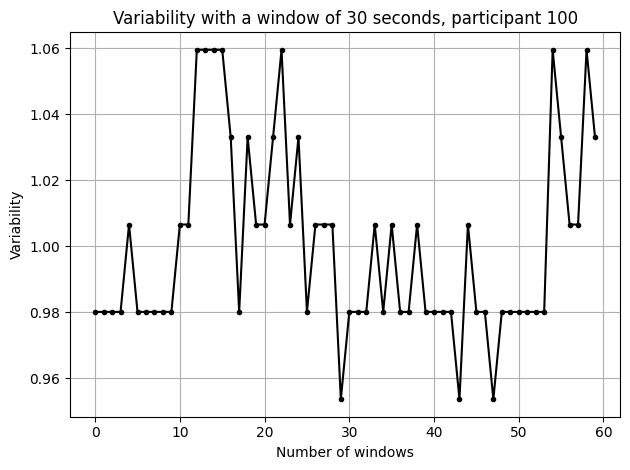

In [56]:
variabilidad = HRV(MLII, p2MLII, 30)

print(f"variabilidad: {variabilidad}")

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Number of windows')
axs.set_ylabel('Variability')
axs.set_title("Variability with a window of 30 seconds, participant 100")
axs.grid(True)
axs.plot(variabilidad, '.-k')

plt.tight_layout()
plt.show()

Ventana de 60 [s] participante 100

contpicksw: [74, 74, 75, 74, 74, 76, 80, 80, 76, 77, 77, 78, 76, 76, 74, 74, 75, 75, 74, 75, 74, 73, 75, 73, 74, 74, 74, 79, 76, 79]
totalWindows: 30
avg: 75.5
variabilidad: [0.9801324503311258, 0.9801324503311258, 0.9933774834437086, 0.9801324503311258, 0.9801324503311258, 1.0066225165562914, 1.0596026490066226, 1.0596026490066226, 1.0066225165562914, 1.0198675496688743, 1.0198675496688743, 1.033112582781457, 1.0066225165562914, 1.0066225165562914, 0.9801324503311258, 0.9801324503311258, 0.9933774834437086, 0.9933774834437086, 0.9801324503311258, 0.9933774834437086, 0.9801324503311258, 0.9668874172185431, 0.9933774834437086, 0.9668874172185431, 0.9801324503311258, 0.9801324503311258, 0.9801324503311258, 1.0463576158940397, 1.0066225165562914, 1.0463576158940397]


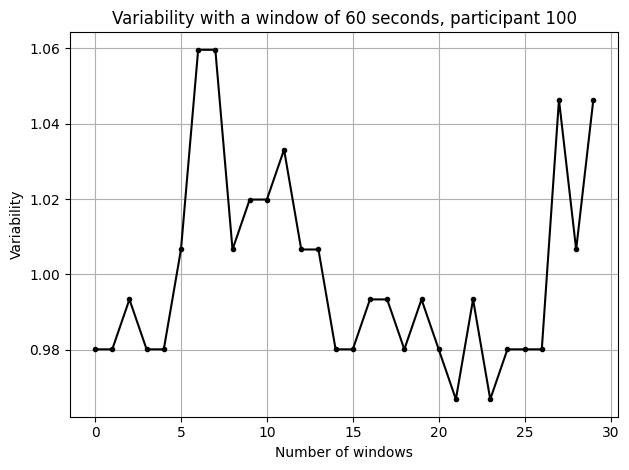

In [57]:
variabilidad = HRV(MLII, p2MLII, 60)

print(f"variabilidad: {variabilidad}")

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Number of windows')
axs.set_ylabel('Variability')
axs.set_title("Variability with a window of 60 seconds, participant 100")
axs.grid(True)
axs.plot(variabilidad, '.-k')

plt.tight_layout()
plt.show()

Ventana de 10 [s] participante 200

contpicksw: [16, 14, 14, 14, 14, 13, 15, 12, 15, 13, 13, 14, 14, 14, 13, 14, 15, 13, 14, 14, 15, 13, 15, 15, 15, 15, 16, 16, 16, 15, 15, 14, 13, 15, 15, 15, 16, 15, 15, 13, 14, 15, 13, 15, 14, 14, 14, 13, 13, 14, 15, 14, 13, 13, 14, 14, 14, 14, 15, 13, 14, 15, 14, 13, 15, 16, 15, 16, 13, 16, 14, 14, 14, 15, 15, 14, 15, 14, 14, 15, 14, 15, 16, 15, 15, 14, 15, 15, 14, 15, 16, 16, 16, 15, 14, 15, 15, 15, 15, 14, 14, 14, 15, 14, 14, 12, 13, 13, 14, 13, 13, 13, 14, 13, 14, 14, 14, 13, 15, 13, 14, 14, 14, 14, 15, 14, 13, 14, 13, 14, 15, 15, 13, 14, 14, 14, 15, 14, 13, 15, 13, 13, 16, 15, 14, 15, 14, 13, 14, 14, 15, 13, 13, 14, 14, 13, 13, 13, 14, 13, 13, 14, 13, 13, 13, 14, 13, 12, 12, 13, 14, 13, 14, 12, 13, 15, 12, 13, 14, 14]
totalWindows: 180
avg: 14.088888888888889
variabilidad: [1.135646687697161, 0.9936908517350158, 0.9936908517350158, 0.9936908517350158, 0.9936908517350158, 0.9227129337539433, 1.0646687697160884, 0.8517350157728707, 1.0646687697160884, 0.9227129337539433, 0.922712933

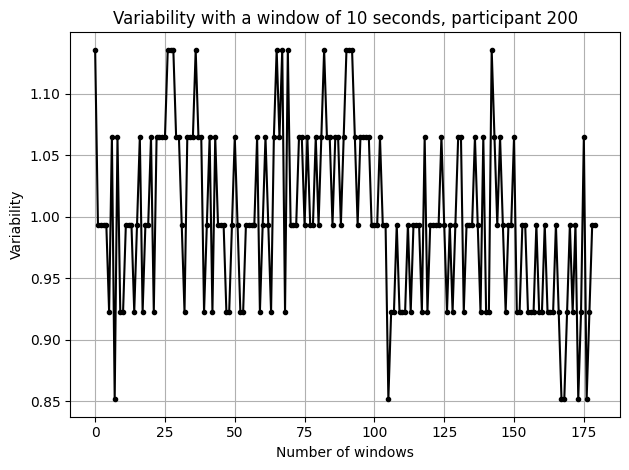

In [58]:
record = wfdb.rdrecord('200')

MLII = record.p_signal[:,0]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

#Se calcula la variabilidad

variabilidad = HRV(MLII, p2MLII, 10)

print(f"variabilidad: {variabilidad}")

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Number of windows')
axs.set_ylabel('Variability')
axs.set_title("Variability with a window of 10 seconds, participant 200")
axs.grid(True)
axs.plot(variabilidad, '.-k')

plt.tight_layout()
plt.show()

Ventana de 30 [s] participante 200

contpicksw: [44, 41, 42, 40, 41, 42, 43, 43, 46, 47, 42, 45, 46, 42, 42, 41, 42, 40, 42, 42, 43, 44, 44, 44, 44, 43, 43, 46, 44, 44, 48, 44, 45, 42, 43, 38, 40, 40, 42, 41, 42, 43, 40, 44, 41, 43, 41, 44, 43, 41, 41, 41, 40, 40, 39, 39, 39, 39, 40, 41]
totalWindows: 60
avg: 42.266666666666666
variabilidad: [1.0410094637223974, 0.970031545741325, 0.9936908517350158, 0.9463722397476341, 0.970031545741325, 0.9936908517350158, 1.0173501577287067, 1.0173501577287067, 1.0883280757097793, 1.11198738170347, 0.9936908517350158, 1.0646687697160884, 1.0883280757097793, 0.9936908517350158, 0.9936908517350158, 0.970031545741325, 0.9936908517350158, 0.9463722397476341, 0.9936908517350158, 0.9936908517350158, 1.0173501577287067, 1.0410094637223974, 1.0410094637223974, 1.0410094637223974, 1.0410094637223974, 1.0173501577287067, 1.0173501577287067, 1.0883280757097793, 1.0410094637223974, 1.0410094637223974, 1.135646687697161, 1.0410094637223974, 1.0646687697160884, 0.9936908517350158, 1.017350157728706

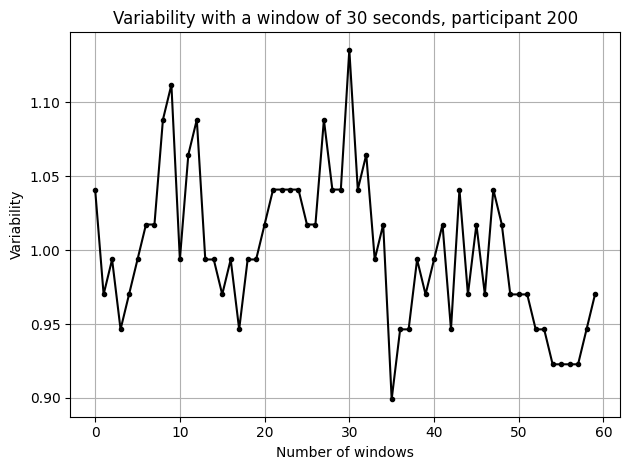

In [59]:
variabilidad = HRV(MLII, p2MLII, 30)

print(f"variabilidad: {variabilidad}")

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Number of windows')
axs.set_ylabel('Variability')
axs.set_title("Variability with a window of 30 seconds, participant 200")
axs.grid(True)
axs.plot(variabilidad, '.-k')

plt.tight_layout()
plt.show()

Ventana de 60 [s] participante 200

contpicksw: [85, 82, 83, 86, 93, 87, 88, 83, 82, 84, 87, 88, 87, 89, 88, 92, 87, 81, 80, 83, 85, 84, 84, 85, 84, 82, 80, 78, 78, 81]
totalWindows: 30
avg: 84.53333333333333
variabilidad: [1.0055205047318612, 0.970031545741325, 0.9818611987381703, 1.0173501577287067, 1.1001577287066246, 1.029179810725552, 1.0410094637223974, 0.9818611987381703, 0.970031545741325, 0.9936908517350158, 1.029179810725552, 1.0410094637223974, 1.029179810725552, 1.052839116719243, 1.0410094637223974, 1.0883280757097793, 1.029179810725552, 0.9582018927444795, 0.9463722397476341, 0.9818611987381703, 1.0055205047318612, 0.9936908517350158, 0.9936908517350158, 1.0055205047318612, 0.9936908517350158, 0.970031545741325, 0.9463722397476341, 0.9227129337539433, 0.9227129337539433, 0.9582018927444795]


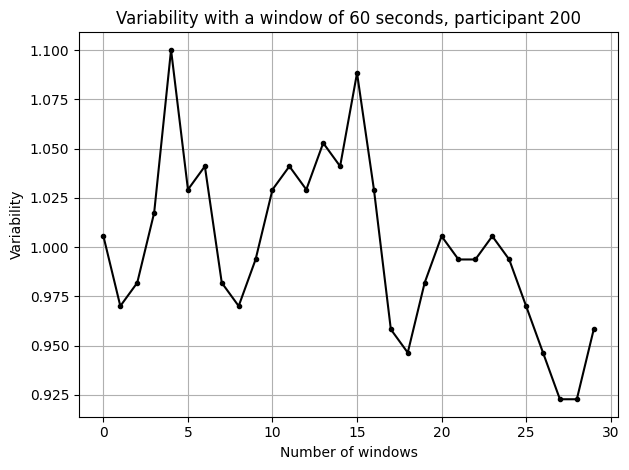

In [60]:
variabilidad = HRV(MLII, p2MLII, 60)

print(f"variabilidad: {variabilidad}")

fig, axs = plt.subplots(1, 1)

axs.set_xlabel('Number of windows')
axs.set_ylabel('Variability')
axs.set_title("Variability with a window of 60 seconds, participant 200")
axs.grid(True)
axs.plot(variabilidad, '.-k')

plt.tight_layout()
plt.show()

5 - Presentar el espectrograma del registro de un participante en 10 minutos de datos

5.1 - Usando FFT (ventana de hamming)

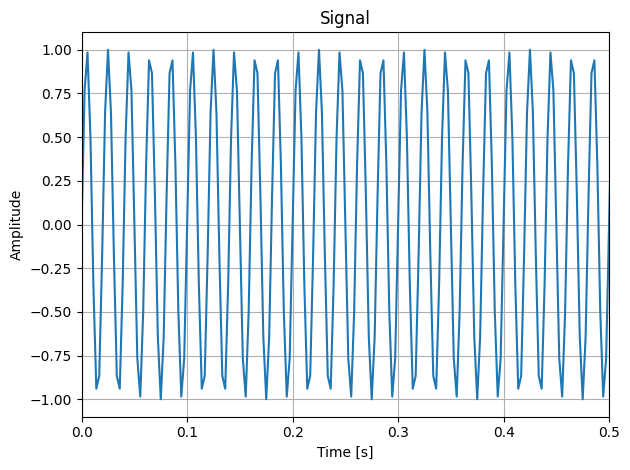

In [61]:
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian

f_s = 360
t = np.arange(0, 10, 1/f_s)
x = np.sin(2 * np.pi * 50 * t)

fig, axs = plt.subplots(1, 1)

axs.plot(t, x)
axs.set_xlabel('Time [s]')
axs.set_ylabel('Amplitude')
axs.set_title("Signal")
axs.grid(True)

plt.xlim([0, 0.5])
plt.tight_layout()
plt.show()



5.2 - usando wavelets (morlet)